In [25]:
from metavision_ml.preprocessing import histo
import numpy as np
from metavision_core.event_io import RawReader
import matplotlib.pyplot as plt
from tqdm import tqdm
from plotting import set_plotting_style

set_plotting_style(plt)


def count_events_per_batch(file, total_dt, no_event_value=0):
    record = RawReader(file)
    height, width = record.get_size()
    tbins = np.arange(10, int(1e3), 10)  # Time bins from 100us to 1000us
    events = []

    for tb in tqdm(tbins):
        record.reset()  # Reset the record to the beginning
        events_per_batch = []
        for start_time in range(0, total_dt, tb):
            _events = record.load_delta_t(tb)
            num_events = len(_events)
            events_per_batch.append(num_events)
        
        events.append(events_per_batch)

    return events


signal = r'D:\CZI_scope\code\data\raw\605_capillary_flow_cut_2024-06-07.raw'
noise = r'D:\CZI_scope\code\data\raw\recording_2024-05-06_07-36-55.raw'

total_dt = int(3e6)  # Total duration of 3 second
batch_dt = int(100)  # Process in batches of 100us
events = count_events_per_batch(signal, total_dt)
fov_pixels = 640 * 480  # Number of pixels in the field of view
# events is a list of lists, where each inner list contains the number of events per batch
means = [np.mean(e) for e in events]
signal_rate = np.array(means) / fov_pixels / (batch_dt / 1e6)  # Convert to Hz
# Use 1 as no event value to avoid division by zero
noise_events = count_events_per_batch(
    noise, total_dt, no_event_value=1)
means = [np.mean(e) for e in noise_events]
noise_rate = np.array(means) / fov_pixels

100%|██████████| 99/99 [00:09<00:00,  9.99it/s]


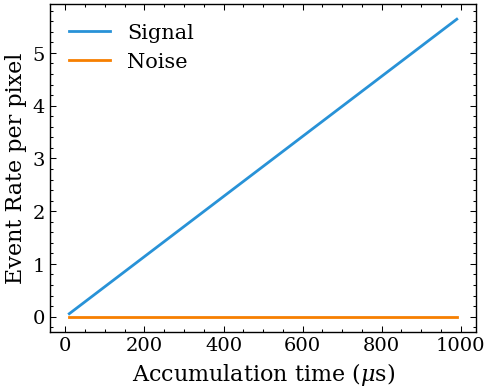

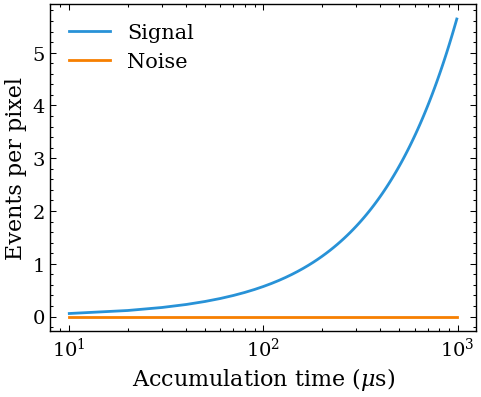

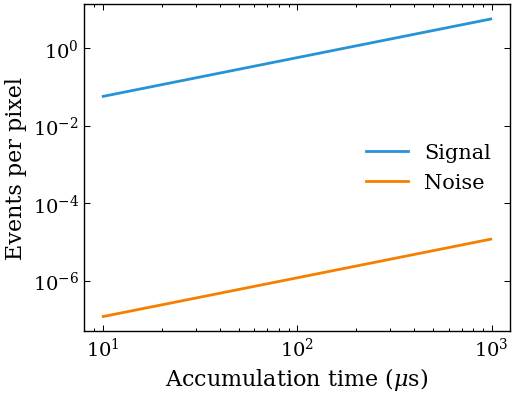

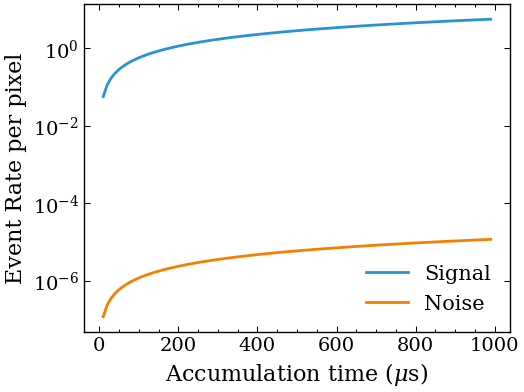

In [26]:
# plot average number of events per batch per pixel
time_bins = np.arange(10, int(1e3), 10)
plt.plot(time_bins, signal_rate, label='Signal')
plt.plot(time_bins, noise_rate, label='Noise')
plt.xlabel('Accumulation time ($\mu$s)')
plt.ylabel('Event Rate per pixel')
plt.legend()
plt.show()
# Plot a semilog plot
plt.plot(time_bins, signal_rate, label='Signal')
plt.plot(time_bins, noise_rate, label='Noise')
plt.xscale('log')
plt.xlabel('Accumulation time ($\mu$s)')
plt.ylabel('Events per pixel')
plt.legend()
plt.show()

# plot on a log/log scale
plt.plot(time_bins, signal_rate, label='Signal')
plt.plot(time_bins, noise_rate, label='Noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Accumulation time ($\mu$s)')
plt.ylabel('Events per pixel')
plt.legend()
plt.show()

# plot a semilog plot y-axis
plt.plot(time_bins, signal_rate, label='Signal')
plt.plot(time_bins, noise_rate, label='Noise')
plt.yscale('log')
plt.xlabel('Accumulation time ($\mu$s)')
plt.ylabel('Event Rate per pixel')
plt.legend()


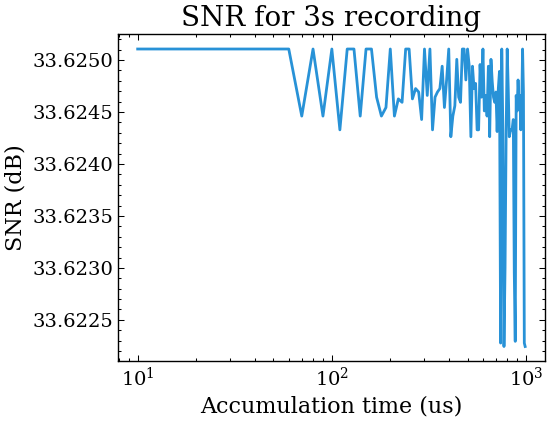

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assuming signal_rates and noise_rates have been calculated as before
snr = np.array(signal_rate) / np.array(noise_rate)

# Convert SNR to decibels
snr_db = 20 * np.log10(snr)

# Create the plot
plt.plot(time_bins, snr_db)
plt.xlabel('Accumulation time (us)')
#plt.xticks(np.arange(0, len(signal_rate), 1), np.arange(5, 25, 5), rotation=45)
plt.ylabel('SNR (dB)')
plt.title('SNR for 3s recording')
plt.xscale('log')

# Use ScalarFormatter to avoid scientific notation on y-axis
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_useOffset(False)  # Ensure no offset is used
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


In [10]:
len(signal_rate)

99